# Cosmo Crew Group Assignment

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
harris_p1 = pd.read_csv('../Data/HarrisPartI.csv')      #  Reading in Harris part 1
harris_p3 = pd.read_csv('../Data/HarrisPartIII.csv')    #  Reading in Harris part 3
krause_21 = pd.read_csv('../Data/Krause21.csv')         #  Reading in Krause21
vandenBerg_t2 = pd.read_csv('../Data/VandenBerg_table2.csv')    #  Reading in VandenBerg table 2

In [4]:
harris_p1.head()    #  Displaying first 5 rows of Harris part 1

,ID,Name,RA,DEC,L,B,R_Sun,R_gc,X,Y,Z
0,NGC 104,47 Tuc,00:24:05.67,-72:04:52.6,305.89,-44.89,4.5,7.4,1.9,-2.6,-3.1
1,NGC 288,NaN,00:52:45.24,-26:34:57.4,152.30,-89.38,8.9,12.0,-0.1,0.0,-8.9
2,NGC 362,NaN,01:03:14.26,-70:50:55.6,301.53,-46.25,8.6,9.4,3.1,-5.1,-6.2
3,Whiting 1,NaN,02:02:57,-03:15:10,161.22,-60.76,30.1,34.5,-13.9,4.7,-26.3
4,NGC 1261,NaN,03:12:16.21,-55:12:58.4,270.54,-52.12,16.3,18.1,0.1,-10.0,-12.9


In [5]:
harris_p3.head()   #  Displaying first 5 rows of Harris part 3

,ID,v_r,v_r_e,v_LSR,sig_v,sig_v_e,c,r_c,r_h,mu_V,rho_0,lg_tc,lg_th
0,NGC 104,-18.0,0.1,-26.7,11.0,0.3,2.07,0.36,3.17,14.38,4.88,7.84,9.55
1,NGC 288,-45.4,0.2,-51.9,2.9,0.3,0.99,1.35,2.23,20.05,1.78,8.99,9.32
2,NGC 362,223.5,0.5,214.0,6.4,0.3,1.76,0.18,0.82,14.80,4.74,7.76,8.93
3,Whiting 1,-130.6,1.8,-138.1,NaN,NaN,0.55,0.25,0.22,NaN,NaN,NaN,7.93
4,NGC 1261,68.2,4.6,54.9,NaN,NaN,1.16,0.35,0.68,17.73,2.99,8.59,9.12


In [6]:
krause_21.head()   #  Displaying first 5 rows of Krause21

,Class,Object,AltName,Mstar,rh,C5,Age,FeH
0,GC,NGC104,47Tuc,6.46,7.10,0.92,12.80,-0.76
1,GC,NGC288,Melotte3,0.46,9.80,0.05,12.20,-1.32
2,GC,NGC362,Dunlop62,2.50,3.50,0.72,10.00,-1.26
3,GC,NGC1261,Caldwell87,3.41,5.50,0.62,10.24,-1.08
4,GC,NGC1851,Dunlop508,5.51,3.05,1.81,7.64,-1.13


In [7]:
vandenBerg_t2.head()   #  Displaying first 5 rows of VandenBerg table 2

,#NGC,Name,FeH,Age,Age_err,Method,Figs,Range,HBtype,R_G,M_V,v_e0,log_sigma_0
0,104,47Tuc,-0.76,11.75,0.25,V,14,11.50–11.75,-0.99,7.4,-9.42,54.8,5.061
1,288,XXXX,-1.32,11.50,0.38,H,24,NaN,0.98,12.0,-6.75,10.9,2.953
2,362,XXXX,-1.30,10.75,0.25,V,13,10.75–11.00,-0.87,9.4,-8.43,44.4,4.938
3,1261,XXXX,-1.27,10.75,0.25,V,13,10.75–11.25,-0.71,18.1,-7.80,23.6,3.913
4,1851,XXXX,-1.18,11.00,0.25,V,13,10.75–11.25,-0.32,16.6,-8.33,47.6,5.136


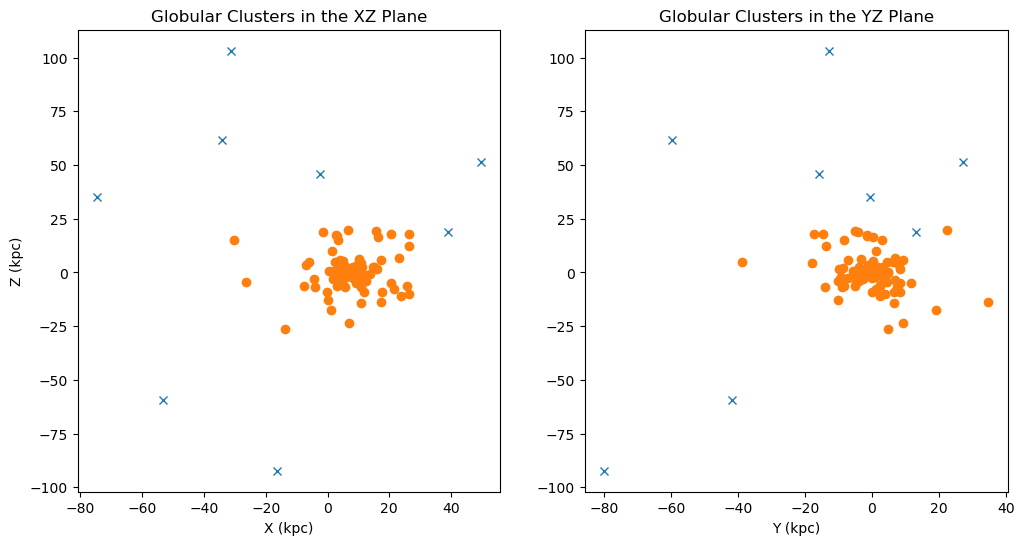

In [8]:
# Combining Harris part 1 and part 3 dataframes
harris = pd.merge(harris_p1, harris_p3, on='ID')
harris.keys()   #  Displaying the column names of the combined Harris dataframe

#Creating a mask to only show globular clusters further than 45 kpc from the Galactic Centre
mask = np.sqrt(np.square(harris['X'])+np.square(harris['Y'])+np.square(harris['Z'])) > 45

# Plotting the positions of the globular clusters in the XZ plane (from the Harris catalogue)
fig = plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(
    harris['X'][mask],
    harris['Z'][mask],
    'x' # Plotting clusters that show up in the mask (greater than 45 kpc from Galactic Centre)
)
plt.plot(
    harris['X'][~mask],
    harris['Z'][~mask],
    'o' # Plotting clusters that do not show up in the mask (less than 45 kpc from Galactic Centre)
)
plt.xlabel('X (kpc)')
plt.ylabel('Z (kpc)')
plt.title('Globular Clusters in the XZ Plane')

# Plotting the positions of the globular clusters in the YZ plane (from the Harris catalogue)
plt.subplot(1,2,2)
plt.plot(
    harris['Y'][mask],
    harris['Z'][mask],
    'x'
)
plt.plot(
    harris['Y'][~mask],
    harris['Z'][~mask],
    'o'
)
plt.xlabel('Y (kpc)')
plt.title('Globular Clusters in the YZ Plane')
plt.show()

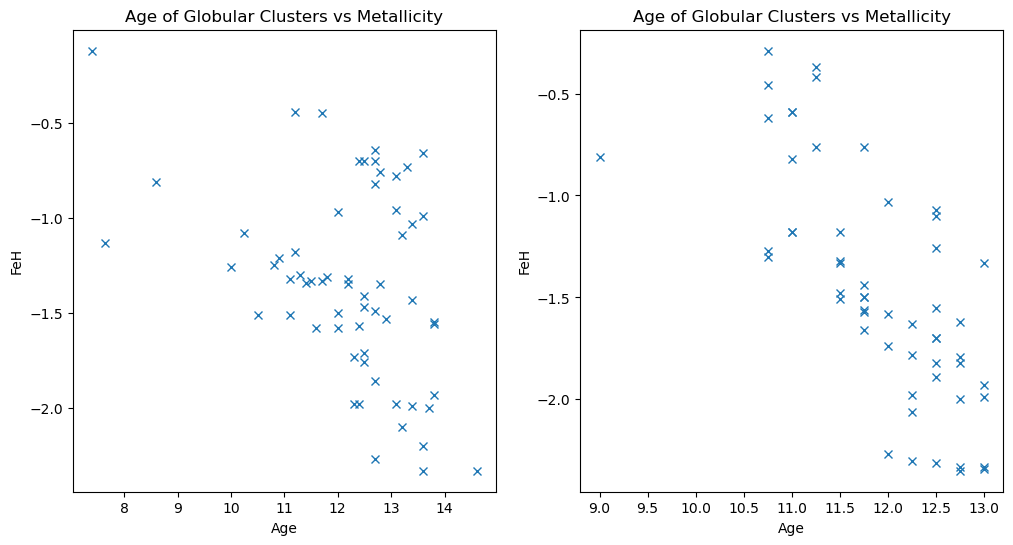

In [ ]:
# Plotting the age of the globular clusters vs metallicity (from the Krause21 catalogue)
fig = plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(
    krause_21['Age'],
    krause_21['FeH'], 'x')

plt.xlabel('Age') #labelling x axis
plt.ylabel('FeH') #labelling y axis
plt.title('Age of Globular Clusters vs Metallicity') #adding title to plot

# Plotting the age of the globular clusters vs metallicity (from the VandenBergt2 catalogue)
plt.subplot(1,2,2)
plt.plot(
    vandenBerg_t2['Age'],
    vandenBerg_t2['FeH'], 'x')

plt.xlabel('Age')
plt.ylabel('FeH')
plt.title('Age of Globular Clusters vs Metallicity')


plt.show()